In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
wine = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/winequality-red.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


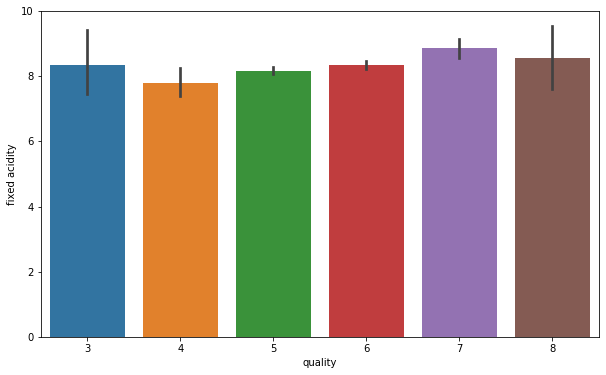

In [5]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

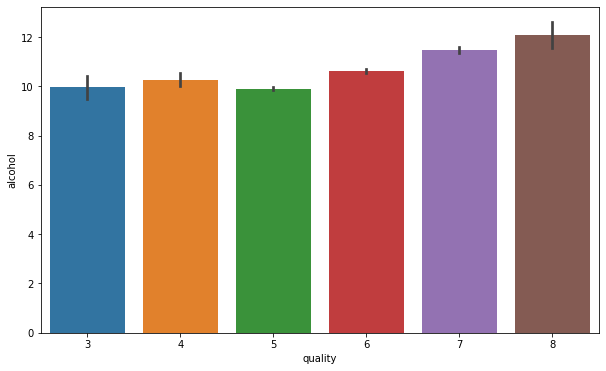

In [6]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [7]:
X = wine.drop('quality', axis = 1)
X = normalize(X, norm='l2')
y = wine['quality']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [9]:
print("Training MLPClassificator...")
reg = MLPClassifier(hidden_layer_sizes =(30,30,30,30 ),solver='sgd',activation = 'logistic',learning_rate='adaptive',learning_rate_init = 0.01,max_iter=10000)

Training MLPClassificator...


In [10]:
reg.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30, 30), learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Resultados
Mean squared error: 1.07
Variance score: -0.67


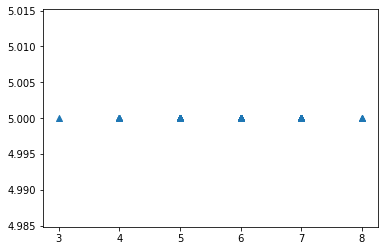

In [11]:
y_predict= reg.predict(X_test)
print("Resultados")
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))
print('Variance score: %.2f' % r2_score(y_test, y_predict))
plt.scatter(y_test,y_predict,marker='^')
plt.show()

teste de overfiting
Mean squared error: 1.05
Variance score: -0.61


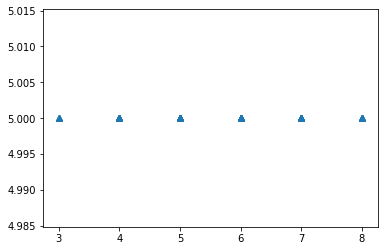

In [12]:
y_predict_train = reg.predict(X_train)
print("teste de overfiting")
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_predict_train))
print('Variance score: %.2f' % r2_score(y_train, y_predict_train))
plt.scatter(y_train,y_predict_train,marker='^')
plt.show()
